In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.svm import SVC

In [ ]:
df = pd.read_csv("dataset.csv")

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [ ]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
2995,F,71,2,1,1,2,2,1,1,1,1,2,1,1,2,NO
2996,F,75,1,2,1,1,1,2,2,2,2,1,1,2,1,NO
2997,F,62,2,2,2,1,2,2,2,2,1,1,2,2,2,YES
2998,M,30,1,1,2,2,2,2,2,2,2,1,2,1,2,YES
2999,M,40,1,2,2,1,1,1,2,2,2,1,1,1,1,YES


In [ ]:
df.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
2495,M,69,1,2,2,2,1,1,2,2,1,1,2,1,1,NO
845,F,60,2,1,1,1,2,1,1,1,2,2,2,2,1,YES
969,F,40,2,1,1,1,1,1,1,1,2,2,1,2,1,NO
113,M,66,2,1,1,1,2,1,2,1,1,2,2,2,1,NO
885,F,38,2,1,1,2,1,2,2,1,1,2,2,1,1,NO


In [ ]:
df.shape


(3000, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## Data Cleaning


In [ ]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

No null/missing values present in the dataset

### Changing categorical columns to numerical

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [ ]:
encoder = LabelEncoder()
df["LUNG_CANCER"] = encoder.fit_transform(df["LUNG_CANCER"])
df["GENDER"] = encoder.fit_transform(df["GENDER"])

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,65,1,1,1,2,2,1,2,2,2,2,2,2,1,0
1,0,55,1,2,2,1,1,2,2,2,1,1,1,2,2,0
2,0,78,2,2,1,1,1,2,1,2,1,1,2,1,1,1
3,1,60,2,1,1,1,2,1,2,1,1,2,1,2,2,1
4,0,80,1,1,2,1,1,2,1,2,1,1,1,1,2,0


## Exploratory Data Analysis

<Axes: >

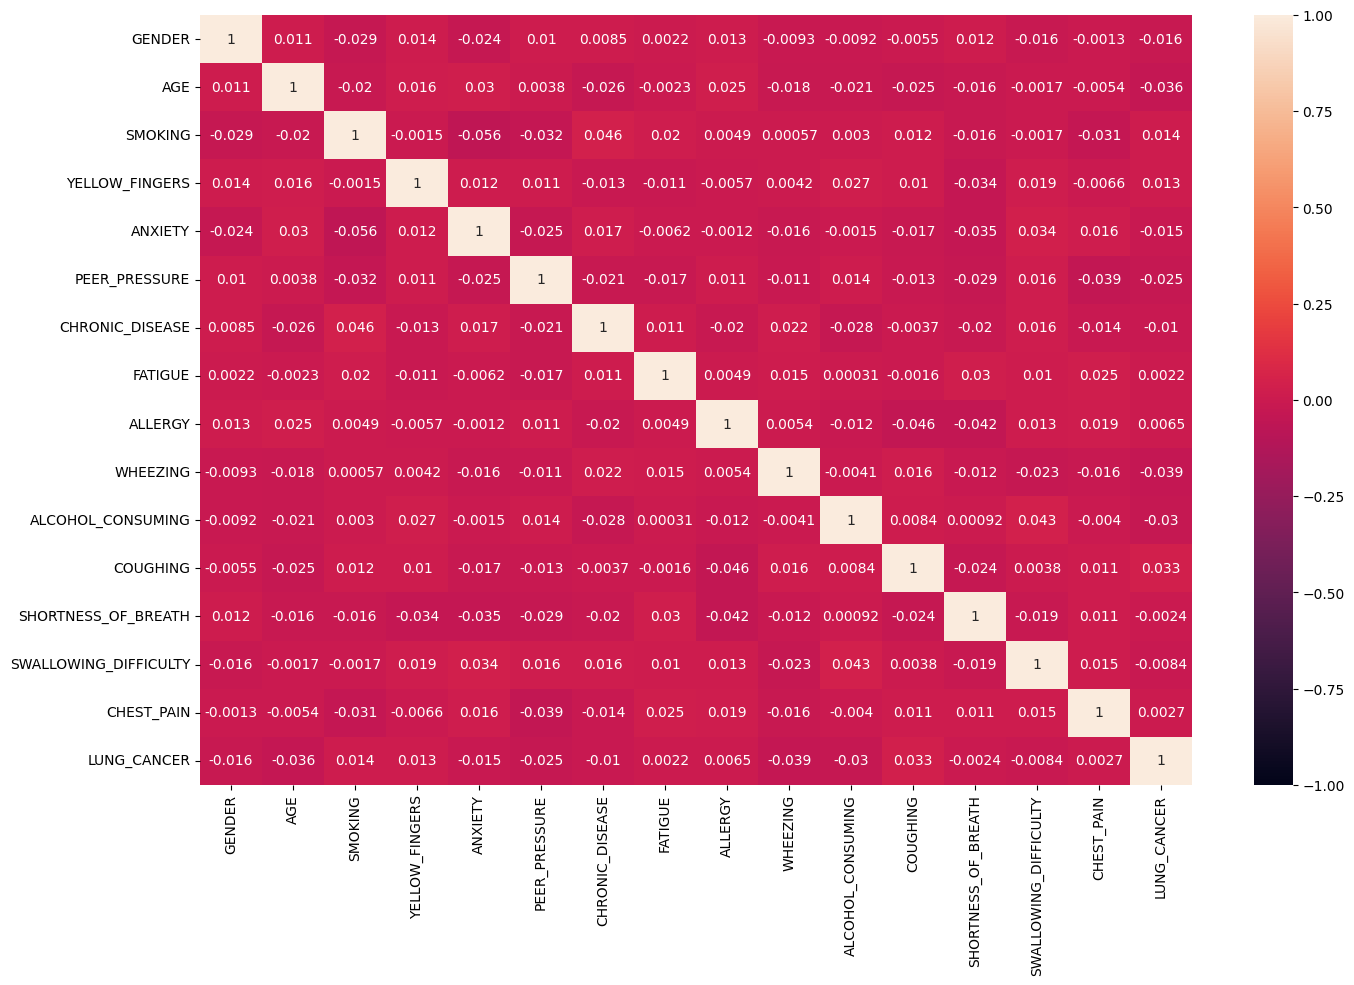

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1)

There aren't a lot of strong correlations among the different features except maybe some minor ones

### Now we will rename the 1s and 2s to No and Yes so it is easier to understand



In [ ]:
df["GENDER"] = df["GENDER"].replace({1:"Male", 0:"Female"})
df["LUNG_CANCER"] = df["LUNG_CANCER"].replace({1:"Yes", 0:"No"})
for column in df.columns:
    df[column] = df[column].replace({1: "No", 2: "Yes"})

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,Male,65,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
1,Female,55,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No
2,Female,78,Yes,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,No,Yes
3,Male,60,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,Yes,Yes,Yes
4,Female,80,No,No,Yes,No,No,Yes,No,Yes,No,No,No,No,Yes,No


<Axes: xlabel='SMOKING', ylabel='count'>

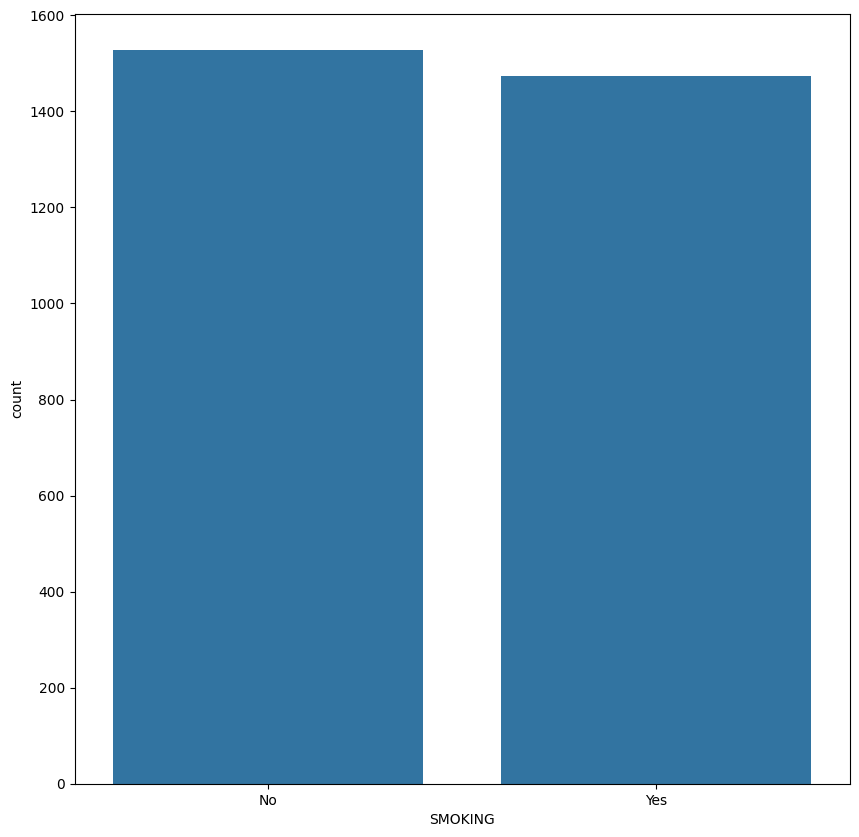

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x="SMOKING", data=df)

In [ ]:
df["SMOKING"].value_counts()

SMOKING
No     1527
Yes    1473
Name: count, dtype: int64

More non smokers in the dataset compared to smokers.



In [ ]:
df.GENDER.value_counts()


GENDER
Male      1514
Female    1486
Name: count, dtype: int64

<Axes: xlabel='GENDER', ylabel='count'>

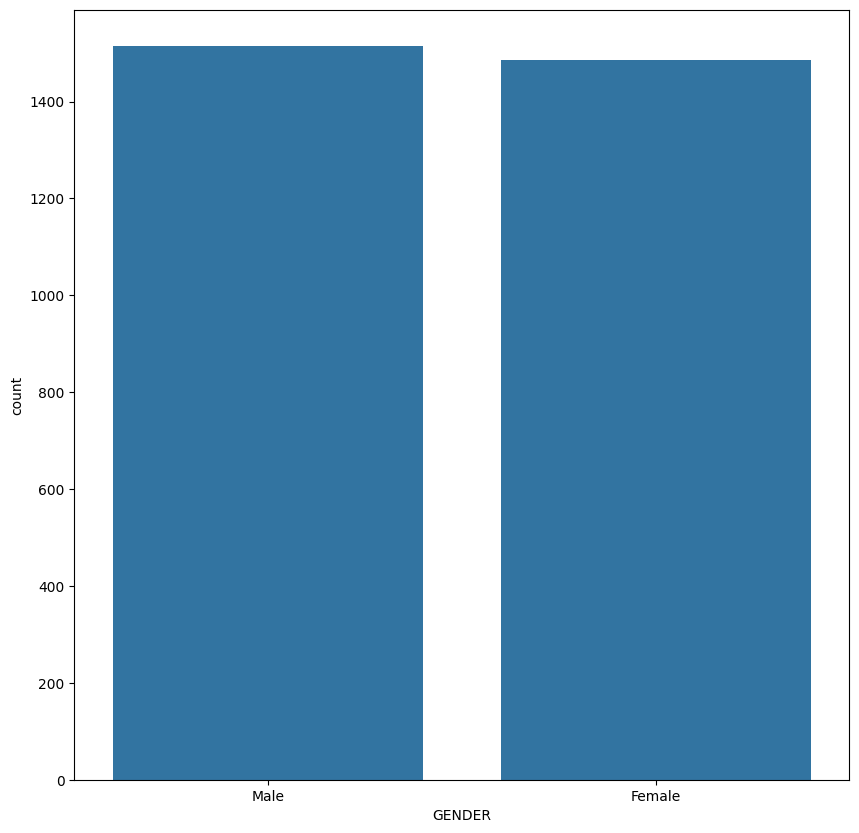

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x="GENDER", data=df)

Dataset contians more data of Male compared to female but the difference between number of males and females is not too much.

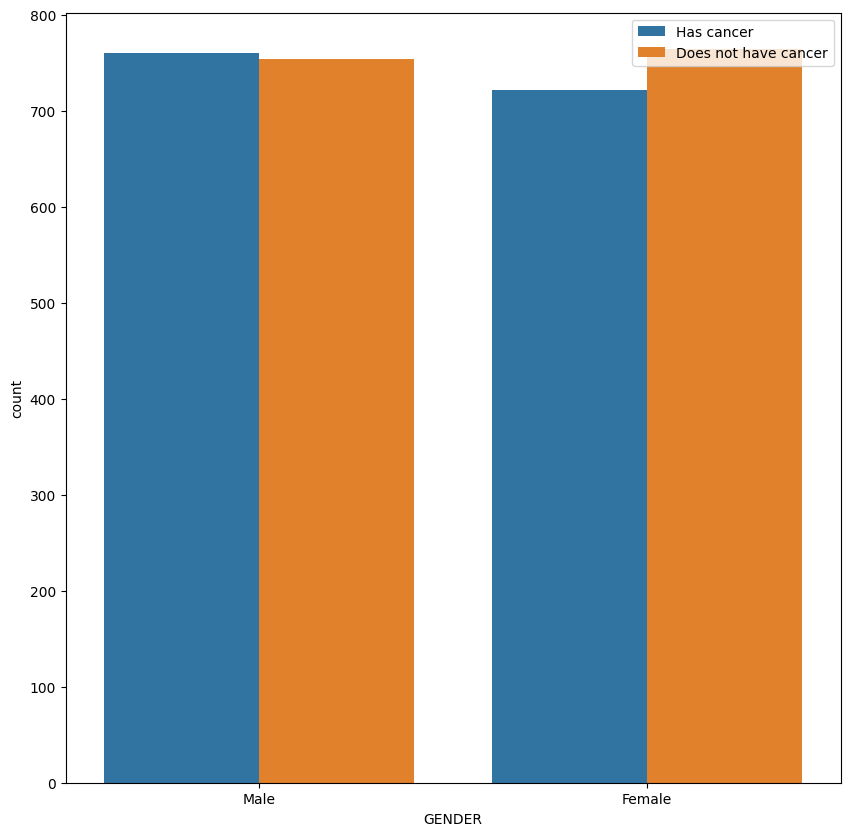

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='GENDER',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])

It seems there is no relationship b/w gender and cancer it can occur to anyone regardless of the gender

Checking whether there is some relation between symptoms and cancer

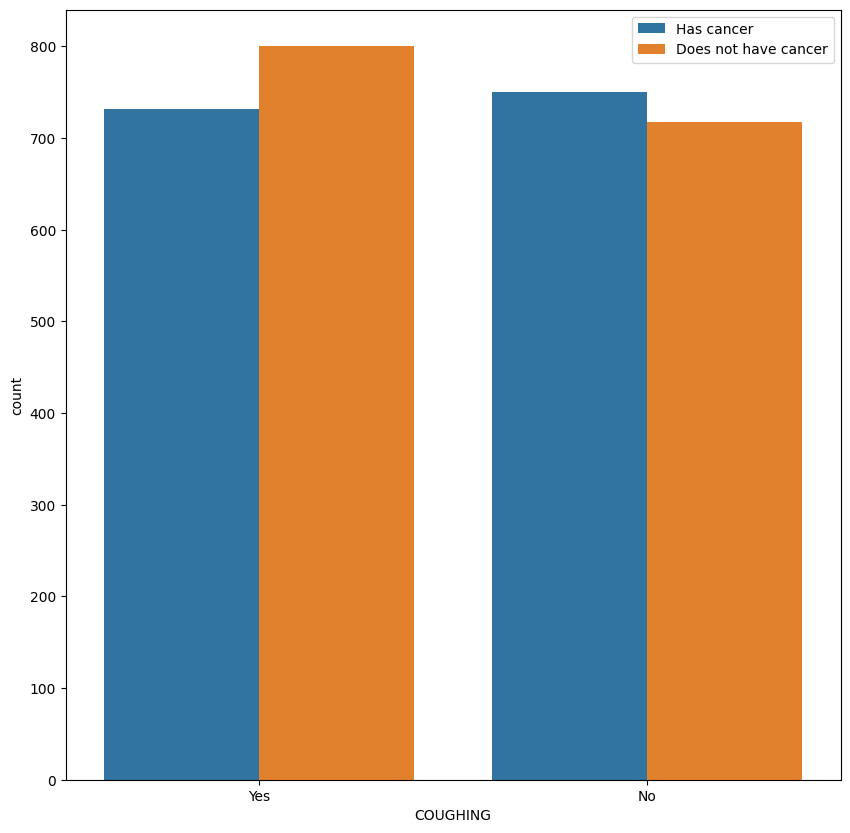

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='COUGHING',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])

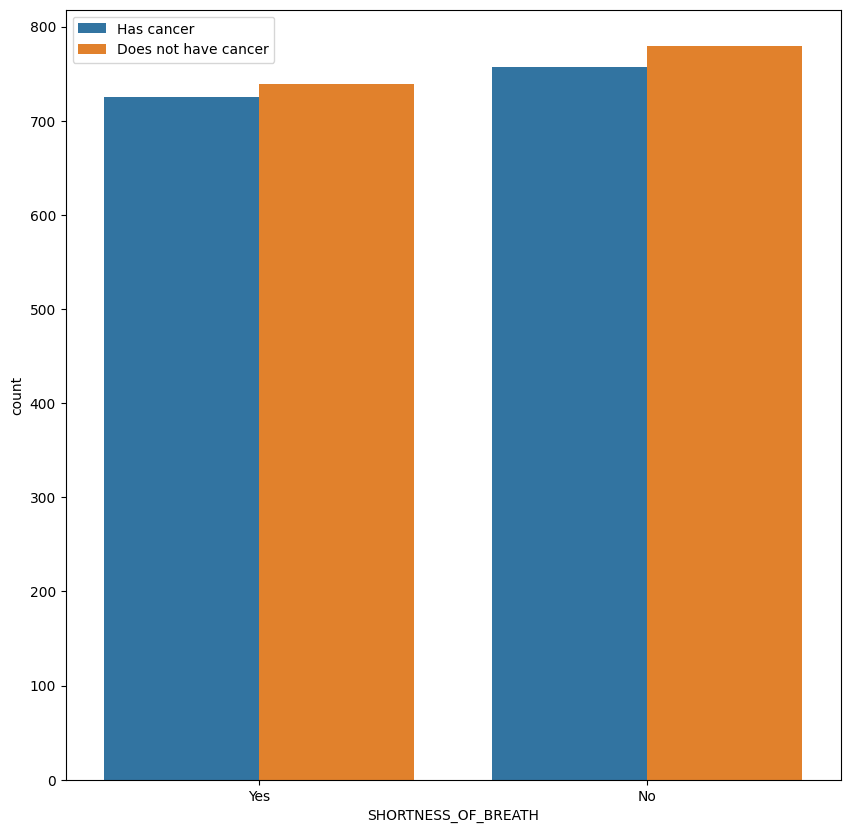

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='SHORTNESS_OF_BREATH',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])

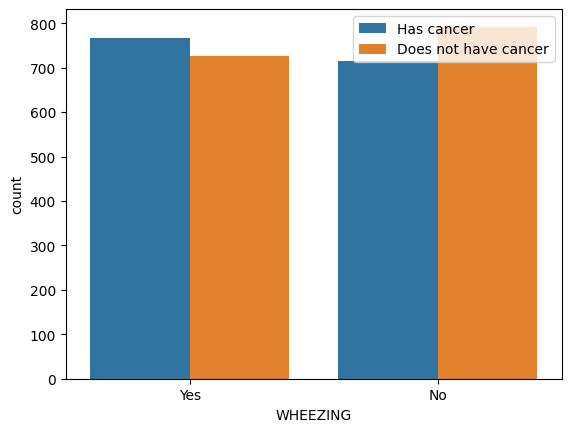

In [ ]:
sns.countplot(data=df,x='WHEEZING',hue='LUNG_CANCER')
plt.legend(["Has cancer", 'Does not have cancer'])

### we can see that it doesn't really matter if the symptoms are showing or not as some people may have cancer yet not show any symptoms. So, regular checkups would be wiser than waiting for symptoms to show up as that may lead it to deteriorate conditions.

<Axes: xlabel='AGE', ylabel='Count'>

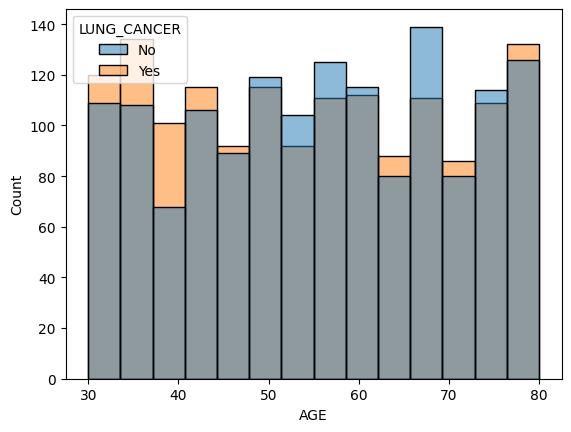

In [ ]:
sns.histplot(data=df,x='AGE',hue='LUNG_CANCER')

Lung cancer is reported higher among 30-45 age group people

### Changing categorical columns to numerical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   object
 3   YELLOW_FINGERS         3000 non-null   object
 4   ANXIETY                3000 non-null   object
 5   PEER_PRESSURE          3000 non-null   object
 6   CHRONIC_DISEASE        3000 non-null   object
 7   FATIGUE                3000 non-null   object
 8   ALLERGY                3000 non-null   object
 9   WHEEZING               3000 non-null   object
 10  ALCOHOL_CONSUMING      3000 non-null   object
 11  COUGHING               3000 non-null   object
 12  SHORTNESS_OF_BREATH    3000 non-null   object
 13  SWALLOWING_DIFFICULTY  3000 non-null   object
 14  CHEST_PAIN             3000 non-null   object
 15  LUNG_CANCER          

In [ ]:

for column in df.select_dtypes(include='object').columns:
    df[column] = encoder.fit_transform(df[column])

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,65,0,0,0,1,1,0,1,1,1,1,1,1,0,0
1,0,55,0,1,1,0,0,1,1,1,0,0,0,1,1,0
2,0,78,1,1,0,0,0,1,0,1,0,0,1,0,0,1
3,1,60,1,0,0,0,1,0,1,0,0,1,0,1,1,1
4,0,80,0,0,1,0,0,1,0,1,0,0,0,0,1,0


<Axes: xlabel='CHRONIC_DISEASE', ylabel='COUGHING'>

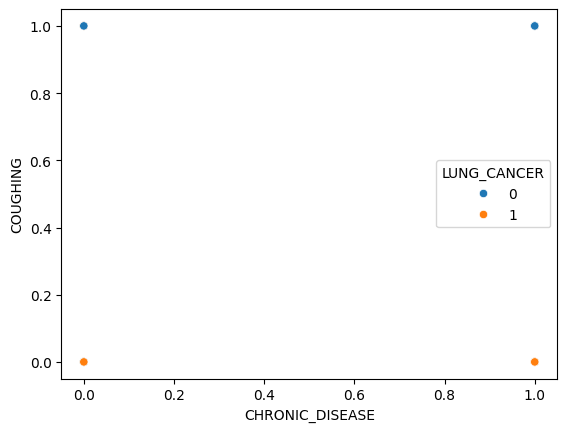

In [ ]:
sns.scatterplot(x='CHRONIC_DISEASE', y='COUGHING',hue="LUNG_CANCER", data=df)


# Building a Machine Learning Model

Split Data into Training and Testing Sets

In [ ]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2100, 15), (900, 15), (2100,), (900,))

Create a model

In [ ]:
model = LogisticRegression()
#model = SVC(kernel='linear')  # You can change the kernel

model.fit(X_train, y_train)


LogisticRegression()

 Model Evaluation


In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5022222222222222


Create RFE object

In [ ]:
rfe = RFE(model, n_features_to_select=9)  # Adjust n_features_to_select as needed


In [ ]:
fit = rfe.fit(X, y)


In [ ]:
print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)


Num Features:  9
Selected Features:  [ True False  True  True  True  True  True False False  True  True  True
 False False False]
Feature Ranking:  [1 6 1 1 1 1 1 4 2 1 1 1 5 3 7]


In [ ]:
y_pred = rfe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5288888888888889


Columns used in model

In [ ]:
X.columns[fit.support_]

Index(['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC_DISEASE', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING'],
      dtype='object')